<a href="https://colab.research.google.com/github/sonpn82/Tensor-flow-Developer-Certification-Exam/blob/main/03_introduction_to_computer_vision_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook in github.com/mrdbourke & image_data_modification.ipynb.

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-27 04:17:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   271MB/s    in 0.4s    

2022-06-27 04:17:55 (271 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [6]:
# The extra file in our pizza_steak directiory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jun 27 04:17 .
drwxr-xr-x 1 root root 4096 Jun 27 04:17 ..
drwxr-xr-x 4 root root 4096 Jun 27 04:17 test
drwxr-xr-x 4 root root 4096 Jun 27 04:17 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectories
#class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  # Setup the target directory (We'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['2404695.jpg']
Image shape: (512, 512, 3)


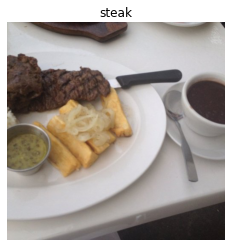

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

In [11]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values 
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[185, 188, 181],
        [185, 188, 181],
        [187, 189, 184],
        ...,
        [ 26,  24,  27],
        [ 28,  28,  28],
        [ 23,  23,  23]],

       [[188, 191, 184],
        [188, 191, 184],
        [189, 191, 186],
        ...,
        [ 25,  23,  26],
        [ 22,  20,  21],
        [ 26,  26,  26]],

       [[190, 193, 186],
        [189, 192, 185],
        [190, 192, 187],
        ...,
        [ 27,  25,  28],
        [ 23,  21,  22],
        [ 28,  26,  27]],

       ...,

       [[196, 192, 189],
        [196, 192, 189],
        [195, 191, 188],
        ...,
        [ 23,  19,  20],
        [ 24,  20,  21],
        [ 25,  21,  22]],

       [[196, 192, 189],
        [195, 191, 188],
        [195, 191, 188],
        ...,
        [ 24,  20,  21],
        [ 25,  21,  22],
        [ 26,  22,  23]],

       [[195, 191, 188],
        [195, 191, 188],
        [194, 190, 187],
        ...,
        [ 25,  21,  2

In [12]:
# View the image shape
img.shape # returns width, height. colour channels

(512, 512, 3)

In [13]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.7254902 , 0.7372549 , 0.70980392],
        [0.7254902 , 0.7372549 , 0.70980392],
        [0.73333333, 0.74117647, 0.72156863],
        ...,
        [0.10196078, 0.09411765, 0.10588235],
        [0.10980392, 0.10980392, 0.10980392],
        [0.09019608, 0.09019608, 0.09019608]],

       [[0.7372549 , 0.74901961, 0.72156863],
        [0.7372549 , 0.74901961, 0.72156863],
        [0.74117647, 0.74901961, 0.72941176],
        ...,
        [0.09803922, 0.09019608, 0.10196078],
        [0.08627451, 0.07843137, 0.08235294],
        [0.10196078, 0.10196078, 0.10196078]],

       [[0.74509804, 0.75686275, 0.72941176],
        [0.74117647, 0.75294118, 0.7254902 ],
        [0.74509804, 0.75294118, 0.73333333],
        ...,
        [0.10588235, 0.09803922, 0.10980392],
        [0.09019608, 0.08235294, 0.08627451],
        [0.10980392, 0.10196078, 0.10588235]],

       ...,

       [[0.76862745, 0.75294118, 0.74117647],
        [0.76862745, 0.75294118, 0.74117647],
        [0.76470588, 0

>**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most commont preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
- Load our images
- Preprocess our imges
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed = 24

# Preprocessing data (get all of the pixel values between 0-1, also call scaling / normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our data\
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=24)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=24)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                                      
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),   # len(train_data) = 1500/32=48, total images=1500, batch_size=32 
                        validation_data=valid_data,
                        validation_steps=len(valid_data))  

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 256ms/step - loss: 0.6659 - accuracy: 0.5987 - val_loss: 0.6073 - val_accuracy: 0.6680
Epoch 2/5
47/47 [==============================] - 13s 273ms/step - loss: 0.5437 - accuracy: 0.7293 - val_loss: 0.4076 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4345 - accuracy: 0.8013 - val_loss: 0.4930 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3913 - accuracy: 0.8207 - val_loss: 0.3817 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3748 - accuracy: 0.8300 - val_loss: 0.4105 - val_accuracy: 0.7960


In [15]:
# Note use GPU time
# No GPU   [==============================] - 120s 3s/step - loss: 0.6176 - accuracy: 0.6620 - val_loss: 0.5296 - val_accuracy: 0.7580
# With GPU [==============================] - 22s 210ms/step - loss: 0.5641 - accuracy: 0.7193 - val_loss: 0.4443 - val_accuracy: 0.7980

>**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above)

In [16]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with theirs:
https://poloclub.github.io/cnn-explainer/?amp=1

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground:
http://playground.tensorflow.org

In [17]:
# Set random seed
tf.random.set_seed = 24

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),                           
  tf.keras.layers.Dense(4, activation="relu"),                               
  tf.keras.layers.Dense(4, activation="relu"),                               
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data)

Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 0.9516 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 246ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 16s 332ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...Let's try improve it now

In [19]:
# Set the random
tf.random.set_seed = 24

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),                               
  tf.keras.layers.Dense(100, activation="relu"),                               
  tf.keras.layers.Dense(100, activation="relu"),                               
  tf.keras.layers.Dense(1, activation="sigmoid")                               
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 4.1491 - accuracy: 0.6507 - val_loss: 1.3480 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 2.1036 - accuracy: 0.6447 - val_loss: 1.7209 - val_accuracy: 0.5960
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.9787 - accuracy: 0.7233 - val_loss: 0.4559 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 14s 304ms/step - loss: 0.6008 - accuracy: 0.7653 - val_loss: 1.3751 - val_accuracy: 0.5740
Epoch 5/5
47/47 [==============================] - 12s 262ms/step - loss: 0.8898 - accuracy: 0.7180 - val_loss: 1.3732 - val_accuracy: 0.6240


In [20]:
# Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


>**Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So eventhough these are less learnable parameters in our convolutional neural network, these are often more helpful in decipering between different **features** in an image.

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batch)
3. Created a model (start with a baseline)
4. Fit the model
5. Evalulate the model_1
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


### 1. Become one with the data

['2965021.jpg']
Image shape: (512, 512, 3)
['262133.jpg']
Image shape: (384, 512, 3)


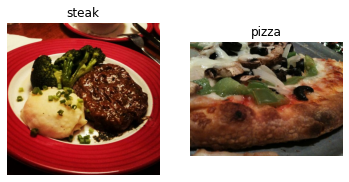

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10, 100 images at onetime, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... (Yann LeCun twitter post...)


In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # target size of images
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of mini batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there : 1500 / 32
len(train_data)

47

In [28]:
# Get the first 2 images
images[:2], images[0].shape

(array([[[[0.6431373 , 0.41960788, 0.34117648],
          [0.5764706 , 0.3647059 , 0.27058825],
          [0.49803925, 0.3137255 , 0.21176472],
          ...,
          [0.8352942 , 0.3647059 , 0.15686275],
          [0.8117648 , 0.34117648, 0.14509805],
          [0.8588236 , 0.37254903, 0.16078432]],
 
         [[0.73333335, 0.50980395, 0.3921569 ],
          [0.7176471 , 0.49411768, 0.3803922 ],
          [0.69411767, 0.48235297, 0.37254903],
          ...,
          [0.81568635, 0.3647059 , 0.15294118],
          [0.78823537, 0.34117648, 0.14509805],
          [0.82745105, 0.36862746, 0.15686275]],
 
         [[0.79215693, 0.54509807, 0.37647063],
          [0.7843138 , 0.53333336, 0.3921569 ],
          [0.74509805, 0.5254902 , 0.39607847],
          ...,
          [0.80392164, 0.35686275, 0.15294118],
          [0.76470596, 0.33333334, 0.14117648],
          [0.7960785 , 0.36078432, 0.15294118]],
 
         ...,
 
         [[0.6313726 , 0.5137255 , 0.2627451 ],
          [0.47058

In [29]:
images[7]

array([[[0.8000001 , 0.53333336, 0.21568629],
        [0.7843138 , 0.5058824 , 0.19215688],
        [0.7725491 , 0.49411768, 0.18823531],
        ...,
        [0.44705886, 0.20784315, 0.08627451],
        [0.43529415, 0.19607845, 0.07450981],
        [0.44705886, 0.20784315, 0.08627451]],

       [[0.7372549 , 0.4666667 , 0.16078432],
        [0.7411765 , 0.46274513, 0.15686275],
        [0.7725491 , 0.4901961 , 0.19215688],
        ...,
        [0.4431373 , 0.20784315, 0.07450981],
        [0.42352945, 0.18823531, 0.05490196],
        [0.44705886, 0.21176472, 0.07843138]],

       [[0.7490196 , 0.4666667 , 0.1764706 ],
        [0.76470596, 0.48235297, 0.19215688],
        [0.75294125, 0.47058827, 0.18039216],
        ...,
        [0.48627454, 0.2509804 , 0.10980393],
        [0.45882356, 0.22352943, 0.08235294],
        [0.47058827, 0.23529413, 0.09411766]],

       ...,

       [[0.43529415, 0.20784315, 0.0627451 ],
        [0.4039216 , 0.18431373, 0.04705883],
        [0.36862746, 0

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when a machine learning experiment and then as you experimenting, you try to beat the baseline

>**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (ex. look at which current model is performing best in the field for your problem).

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10,  # number of sliding window going across an input (higher = more complex model)
         kernel_size=3,  # side of sliding window going across an input
         strides=1,  # size of the step of the sliding window
         padding="valid", # if same, output shape = input same, if valid, output shape < input shape
         activation="relu",
         input_shape=(224, 224, 3)), # input layer, specifile input shape
  Conv2D(10, 3, activation="relu"),                      
  Conv2D(10, 3, activation="relu"),    
  Flatten(),
  Dense(1, activation="sigmoid") # output layer, working with binary classification so only 1 output neuron                 
])

**Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 mins:
https://poloclub.github.io/cnn-explainer/

In [34]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 16s 313ms/step - loss: 0.6324 - accuracy: 0.6653 - val_loss: 0.4579 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 16s 336ms/step - loss: 0.4427 - accuracy: 0.8060 - val_loss: 0.3966 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 15s 315ms/step - loss: 0.2981 - accuracy: 0.8807 - val_loss: 0.3725 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 14s 296ms/step - loss: 0.1444 - accuracy: 0.9567 - val_loss: 0.3331 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 15s 313ms/step - loss: 0.0553 - accuracy: 0.9853 - val_loss: 0.4025 - val_accuracy: 0.8480


In [38]:
model_1.evaluate(test_data)

16/16 [==============================] - 4s 220ms/step - loss: 0.4105 - accuracy: 0.7960


[0.4105229675769806, 0.7960000038146973]

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

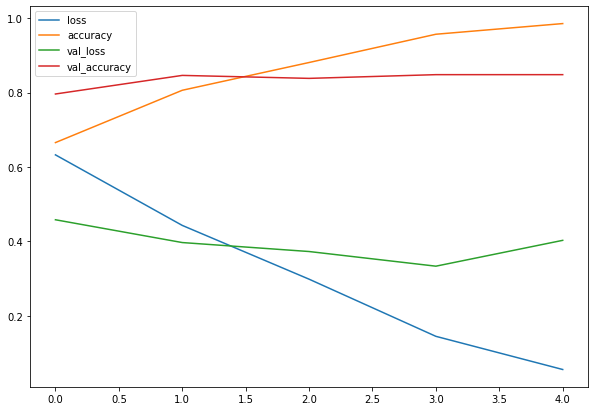

In [40]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [41]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  
  epochs = range(len(history.history["loss"])) # How many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

>**Note:** When a model's **validation loss start to increase**, it's likely that the model is **overfitting** the training dataset. This mean it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

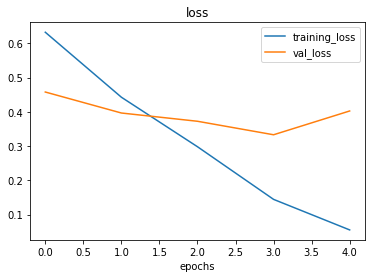

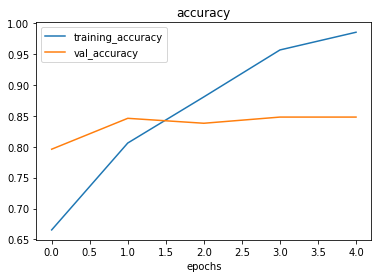

In [42]:
# Check out the loss and accuracy of model 4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

>**Note:** Reducing overfitting is also known as *regularization*

In [43]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                        
])

In [44]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [45]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 295ms/step - loss: 0.6413 - accuracy: 0.6200 - val_loss: 0.4766 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4866 - accuracy: 0.7727 - val_loss: 0.4227 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4304 - accuracy: 0.8073 - val_loss: 0.4020 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3968 - accuracy: 0.8187 - val_loss: 0.3259 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4170 - accuracy: 0.8160 - val_loss: 0.3461 - val_accuracy: 0.8440


In [46]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [47]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


Model 5 with 8k parameters performs better than model 4 with over 400k parameters!

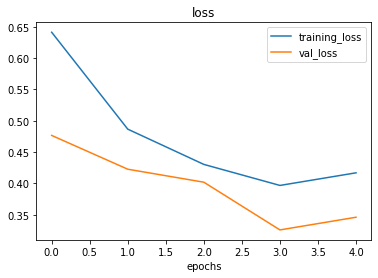

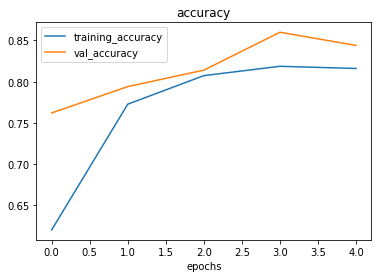

In [48]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [49]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,  # how much to rotate image
                                             shear_range=0.2,  # how much to shear an image
                                             zoom_range=0.02,  # zoom in randomlly 
                                             width_shift_range=0.2,  # move image around on X axis
                                             height_shift_range=0.2,  # move image around on Y axis
                                             horizontal_flip=True)  # to flip an image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

>**Question:** What is data augmentation ?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [50]:
# Import data and augment it from training directory
IMG_SIZE = (224, 224)

print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=IMG_SIZE,
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle=False) # for demonstration only, otherwise should be true

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary"
                                             )

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


>**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!

In [51]:
# Get samples augmented batches
images, labels = train_data.next()
augmented_images, augmented_lables = train_data_augmented.next() # Labels are not augmented

showing image number: 28


(-0.5, 223.5, 223.5, -0.5)

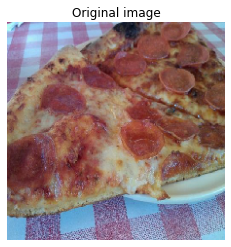

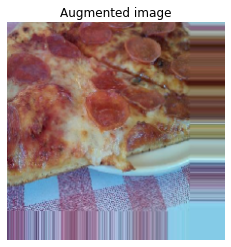

In [52]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size is 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's buid a model and see how it learns

In [53]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,  # Fit model 6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 472ms/step - loss: 0.7011 - accuracy: 0.4973 - val_loss: 0.6752 - val_accuracy: 0.5680
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.6986 - accuracy: 0.4400 - val_loss: 0.6853 - val_accuracy: 0.5180
Epoch 3/5
47/47 [==============================] - 36s 775ms/step - loss: 0.6925 - accuracy: 0.5007 - val_loss: 0.6796 - val_accuracy: 0.5240
Epoch 4/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6901 - accuracy: 0.5680 - val_loss: 0.6788 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.7014 - accuracy: 0.5833 - val_loss: 0.6552 - val_accuracy: 0.7340


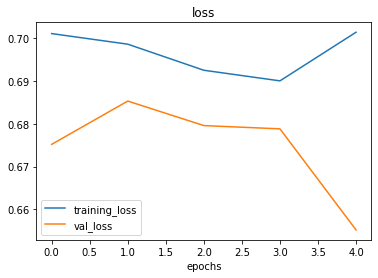

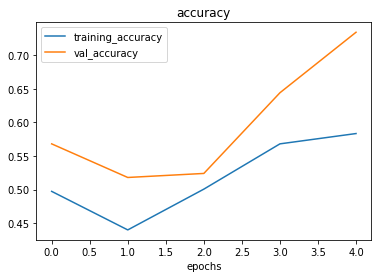

In [54]:
# Check our models training curves
plot_loss_curves(history_6)

Model perform poorly, maybe because of not shuffle randomly

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happends.

In [55]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  class_mode="binary",
                                                                  batch_size=32,
                                                                  shuffle=True)  # shuffle data this time



Found 1500 images belonging to 2 classes.


In [56]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,  # Fit model 6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.6614 - accuracy: 0.5720 - val_loss: 0.5090 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4614 - accuracy: 0.7867 - val_loss: 0.3416 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4237 - accuracy: 0.8107 - val_loss: 0.3703 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3975 - accuracy: 0.8253 - val_loss: 0.3179 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3626 - accuracy: 0.8440 - val_loss: 0.3406 - val_accuracy: 0.8680


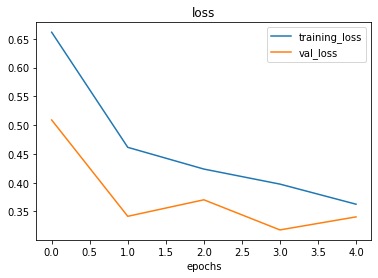

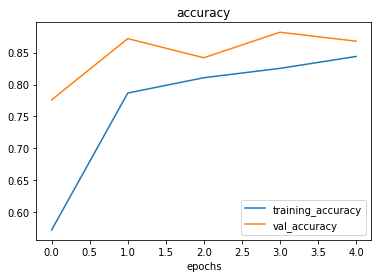

In [57]:
# Plot loss curves
plot_loss_curves(history_7)

Shuffle improve our model's accuracy!  
>**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to improve our model:

* Increase the number of model layers (ex add more `Conv2D / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (ex from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [58]:
# Create the model
model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation="sigmoid")                      
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 401ms/step - loss: 0.6196 - accuracy: 0.6353 - val_loss: 0.4596 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 14s 306ms/step - loss: 0.4344 - accuracy: 0.8107 - val_loss: 0.3511 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 14s 303ms/step - loss: 0.4235 - accuracy: 0.8127 - val_loss: 0.3607 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3661 - accuracy: 0.8467 - val_loss: 0.3247 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3061 - accuracy: 0.8780 - val_loss: 0.2987 - val_accuracy: 0.8720


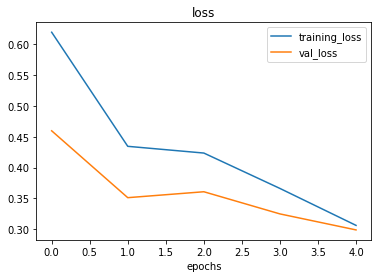

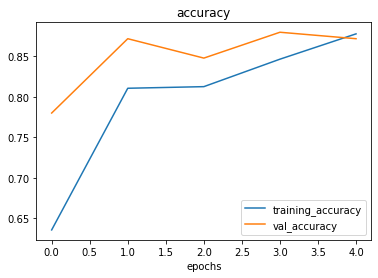

In [59]:
# Plot loss curve
plot_loss_curves(history_8)

## Making a prediction with our trained model on our own custom data

In [60]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-06-27 04:27:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-06-27 04:27:49 (46.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

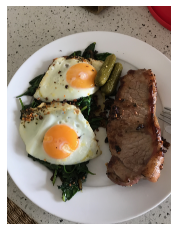

In [61]:
# View our sample image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("/content/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [62]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [63]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

model_7.predict(steak)

ValueError                                Traceback (most recent call last)
<ipython-input-70-2d762cfb3cf3> in <module>()
----> 1 model_7.predict(steak)

1 frames
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in autograph_handler(*args, **kwargs)
   1145           except Exception as e:  # pylint:disable=broad-except
   1146             if hasattr(e, "ag_error_metadata"):
-> 1147               raise e.ag_error_metadata.to_exception(e)
   1148             else:
   1149               raise

ValueError: in user code:

    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.7/dist-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 3024, 3)

>**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [67]:
# Create a function to import an image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [70]:
# Load in and preprocess our custome image
steak = load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([224, 224, 3])

In [74]:
# need to expand 1 more dims to the image to account for the batch size info
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8365591]], dtype=float32)

Looks like our custome image is being put through our model. However, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [73]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [75]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [76]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocessing it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

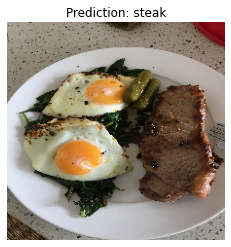

In [77]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza!

--2022-06-27 04:53:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-06-27 04:53:23 (44.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



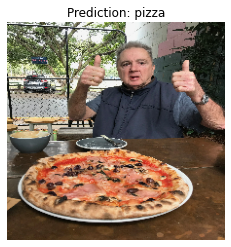

In [78]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

## Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [80]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-27 05:21:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   224MB/s    in 2.2s    

2022-06-27 05:21:23 (224 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [81]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [82]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun 27 05:21 .
drwxr-xr-x  1 root root 4096 Jun 27 05:21 ..
drwxr-xr-x 12 root root 4096 Jun 27 05:21 test
drwxr-xr-x 12 root root 4096 Jun 27 05:21 train


In [83]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [84]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1718861.jpg']
Image shape: (512, 512, 3)


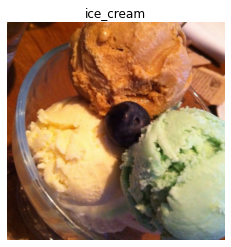

In [104]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [106]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem?

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Create our model (same as CNN explainer website)
model_9 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # have 10 neurons and use softmax activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

### 4. Fit a model

In [108]:
# Fit the model
history_9 = model_9.fit(train_data,  # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1274 - accuracy: 0.2168 - val_loss: 2.0067 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 1.8814 - accuracy: 0.3421 - val_loss: 1.8894 - val_accuracy: 0.3404
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.5813 - accuracy: 0.4591 - val_loss: 1.8633 - val_accuracy: 0.3560
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 1.0473 - accuracy: 0.6492 - val_loss: 2.2781 - val_accuracy: 0.3196
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.4835 - accuracy: 0.8461 - val_loss: 3.1365 - val_accuracy: 0.2824


### 5. Evaluate the model

In [110]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 3.1365 - accuracy: 0.2824


[3.1364505290985107, 0.2824000120162964]

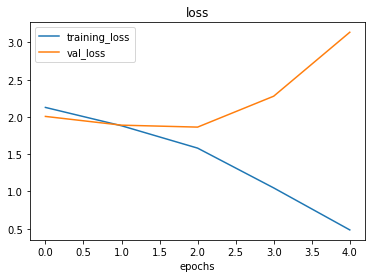

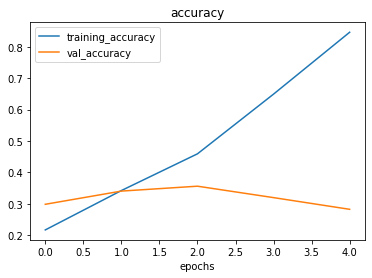

In [111]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear uor model is learning something...
However, it's not generalizing well to unseen data (overfitting).

So let's try and fix overfitting by ...
* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [112]:
# How about we try and simplify the model first?
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [113]:
# Let's try to remove 2 convolutional layers...
model_10 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                       
])

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [115]:
model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)               

In [119]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
             epochs=5,
             steps_per_epoch=len(train_data),
             validation_data=test_data,
             validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 212ms/step - loss: 0.1898 - accuracy: 0.9564 - val_loss: 3.4882 - val_accuracy: 0.2872
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 0.0825 - accuracy: 0.9875 - val_loss: 4.0314 - val_accuracy: 0.2720
Epoch 3/5
235/235 [==============================] - 42s 180ms/step - loss: 0.0333 - accuracy: 0.9979 - val_loss: 4.6664 - val_accuracy: 0.2800
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.0157 - accuracy: 0.9993 - val_loss: 4.9291 - val_accuracy: 0.2788
Epoch 5/5
235/235 [==============================] - 46s 198ms/step - loss: 0.0092 - accuracy: 0.9996 - val_loss: 5.2178 - val_accuracy: 0.2776


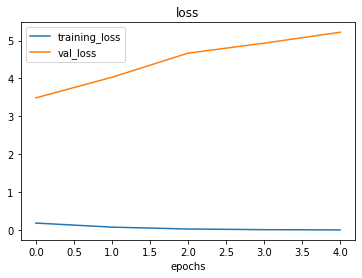

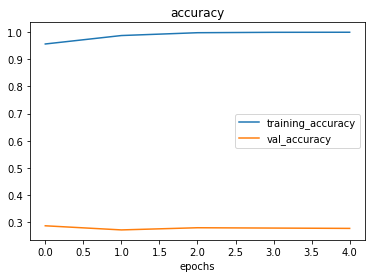

In [120]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [144]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [145]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using  the same setup as previous models)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])
model_11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [146]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 118s 500ms/step - loss: 2.2389 - accuracy: 0.1595 - val_loss: 2.0701 - val_accuracy: 0.2508
Epoch 2/5
235/235 [==============================] - 161s 687ms/step - loss: 2.0900 - accuracy: 0.2584 - val_loss: 1.9298 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 122s 519ms/step - loss: 2.0184 - accuracy: 0.2884 - val_loss: 1.8801 - val_accuracy: 0.3460
Epoch 4/5
235/235 [==============================] - 110s 467ms/step - loss: 1.9807 - accuracy: 0.3000 - val_loss: 1.8661 - val_accuracy: 0.3484
Epoch 5/5
235/235 [==============================] - 109s 463ms/step - loss: 1.9347 - accuracy: 0.3269 - val_loss: 1.8155 - val_accuracy: 0.3532


In [147]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 3.1365 - accuracy: 0.2824


[3.1364505290985107, 0.2824000120162964]

In [148]:
model_11.evaluate(test_data)

79/79 [==============================] - 11s 135ms/step - loss: 1.8155 - accuracy: 0.3532


[1.8155406713485718, 0.3531999886035919]

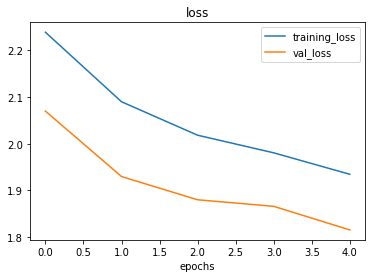

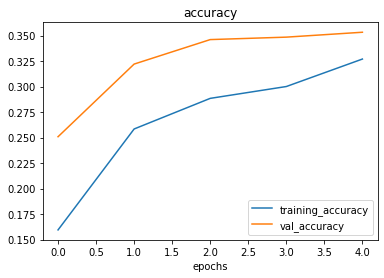

In [149]:
plot_loss_curves(history_11)

Woah! That looks much better, the loss curves are much closer to each other than baseline model and they look like they're heading in the right directioni (certainly not the wrong direction) so if we were to train for longer, we might see further improvments.

### 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experimentsm namely:
- Restructuring our model's architecture (increasing layers/hidden units)
- Adjust the learning rate
- Try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- Training for longer (ex 10 epochs instead)
- try **transfer learning**

### Making prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [150]:
# Remind ourselves of the classes our mdoel is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [151]:
# Download some images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-06-27 08:01:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2022-06-27 08:01:18 (79.9 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]

--2022-06-27 08:01:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

In [175]:
# Reconfig pred_and_plot function to work with multi_class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & Get the predicted class
  if len(pred[0]) > 1:    
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

[[0.2267199  0.16257441 0.05886911 0.13766605 0.08523501 0.00414213
  0.16826488 0.04948991 0.01306642 0.09397218]]
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


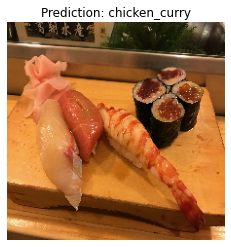

In [171]:
# Make a prediction using model 11
pred_and_plot(model=model_11,
              filename="03-sushi.jpeg",
              class_names=class_names)

[[0.04653115 0.05849806 0.08096245 0.18028757 0.16346352 0.1182936
  0.02975046 0.10992246 0.14020775 0.07208295]]
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


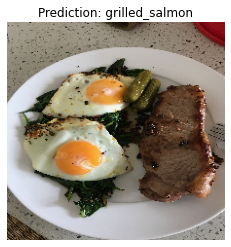

In [172]:
# Make a prediction again
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

[[0.05207166 0.00777792 0.18540683 0.04657708 0.07989846 0.05754364
  0.11552277 0.3631074  0.01463675 0.07745747]]
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


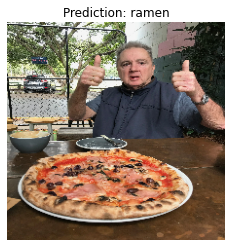

In [173]:
# Make a prediction again
pred_and_plot(model=model_11,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

[[0.08456093 0.05137741 0.09489312 0.04740581 0.10150228 0.05116897
  0.203845   0.18640828 0.06150148 0.11733671]]
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


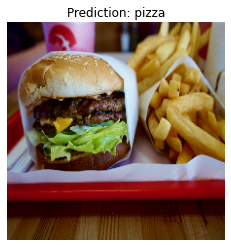

In [174]:
# Make a prediction again
pred_and_plot(model=model_11,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but his because it only achived ~39# accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and loading our model

In [176]:
# Save a model
save_modelName = "saved_trained_model_11"
model_11.save(save_modelName)

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [177]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model(save_modelName)
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 1.8155 - accuracy: 0.3532


[1.8155410289764404, 0.3531999886035919]

In [178]:
# Compare our loaded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.8155 - accuracy: 0.3532


[1.8155407905578613, 0.3531999886035919]